# Exploratory Data Analysis

---

Sure, here's an alternate way to express the content you provided:

1. **Importing Necessary Packages:**
   - Import the required libraries and frameworks, such as pandas, numpy, matplotlib, and seaborn.

2. **Data Loading with Pandas:**
   - Utilize Pandas to load the dataset into a DataFrame, allowing easy manipulation and analysis of the data.

3. **Descriptive Statistics:**
   - Generate descriptive statistics of the dataset, including measures like mean, median, standard deviation, and quartiles.

4. **Data Visualization:**
   - Employ data visualization techniques using matplotlib and seaborn to create insightful plots and charts that help in understanding patterns, trends, and relationships within the data.

5. **Hypothesis Investigation:**
   - Formulate hypotheses based on observed patterns or business questions. Use statistical methods and tests to investigate and validate these hypotheses, gaining deeper insights into the dataset.

---

## 1. Importing Necessary Packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## 2. Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python

In [2]:
client_df = pd.read_csv("C:/Users/HI/Desktop/BCG Task 1/Task 2/Task 2/client_data.csv")
price_df = pd.read_csv("C:/Users/HI/Desktop/BCG Task 1/Task 2/Task 2/price_data.csv")

Taking a closer look at the data, let's explore the content within the first three rows of both dataframes.

In [3]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


Within the client data, there exists a blend of numeric and categorical information, demanding transformation prior to modeling in later stages.

In [4]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


Considering the price data, it comprises entirely of numerical values; however, a substantial number of zeros are evident.

---

## 3. Descriptive statistics

### Data types

Understanding the data you're working with, including the data types of each column, is beneficial. The nature of data types might influence the way you manipulate and design features.

In [5]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [6]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


Observing that all columns related to datetime are presently not in `datetime` format, we will need to perform a conversion at a later stage.

### Statistics

Now, let's examine some statistical insights regarding the datasets. Now let's look at some statistics about the datasets

In [7]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [8]:
print(client_df.columns)


Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')


The describe method provides extensive information about the client data. The crucial observation to extract from this is that our data is highly skewed, evident in the percentile values.

In [9]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In general, the price data appears satisfactory.

---

## 4. Data visualization

Let's now delve into the dataframes for a more detailed analysis.

In [10]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

### Churn

In [11]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100

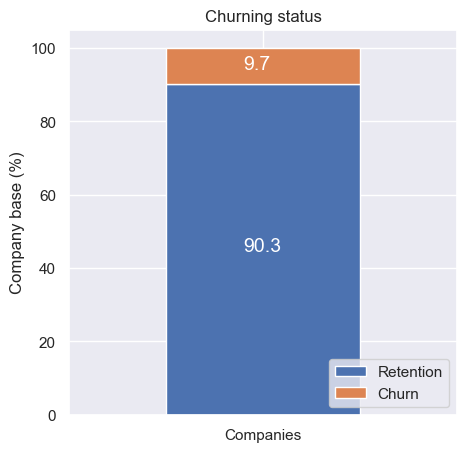

In [12]:
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

Approximately 10% of the total customer base has experienced churn. (This seems to align with expectations.)

### Sales channel

In [13]:
channel = client_df[['id', 'channel_sales', 'churn']]
channel = channel.groupby([channel['channel_sales'], channel['churn']])['id'].count().unstack(level=1).fillna(0)
channel_churn = (channel.div(channel.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

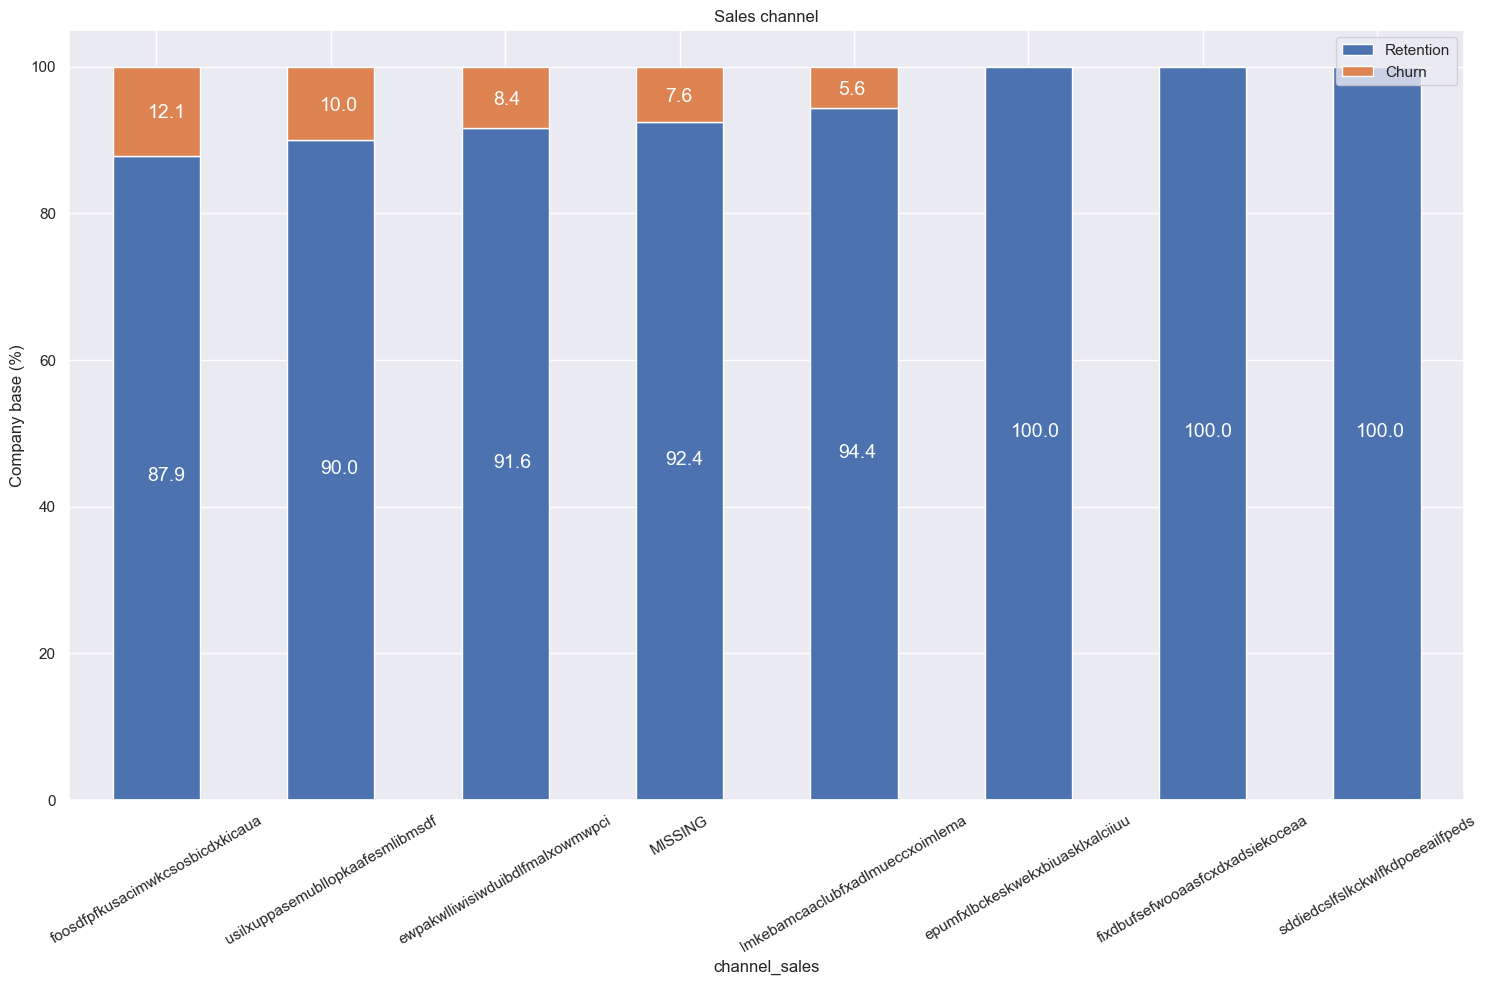

In [14]:
plot_stacked_bars(channel_churn, 'Sales channel', rot_=30)

Remarkably, the customers who have churned are spread across five distinct values for channel_sales. Additionally, the "MISSING" category, signifying a missing value that was introduced during dataset cleaning, exhibits a churn rate of 7.6%. This feature could prove significant in constructing our model.

### Consumption

Let's examine the distribution of consumption in the last year and month. As the consumption data is univariate, we can utilize histograms to visualize their distribution.

In [15]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

In [16]:
def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

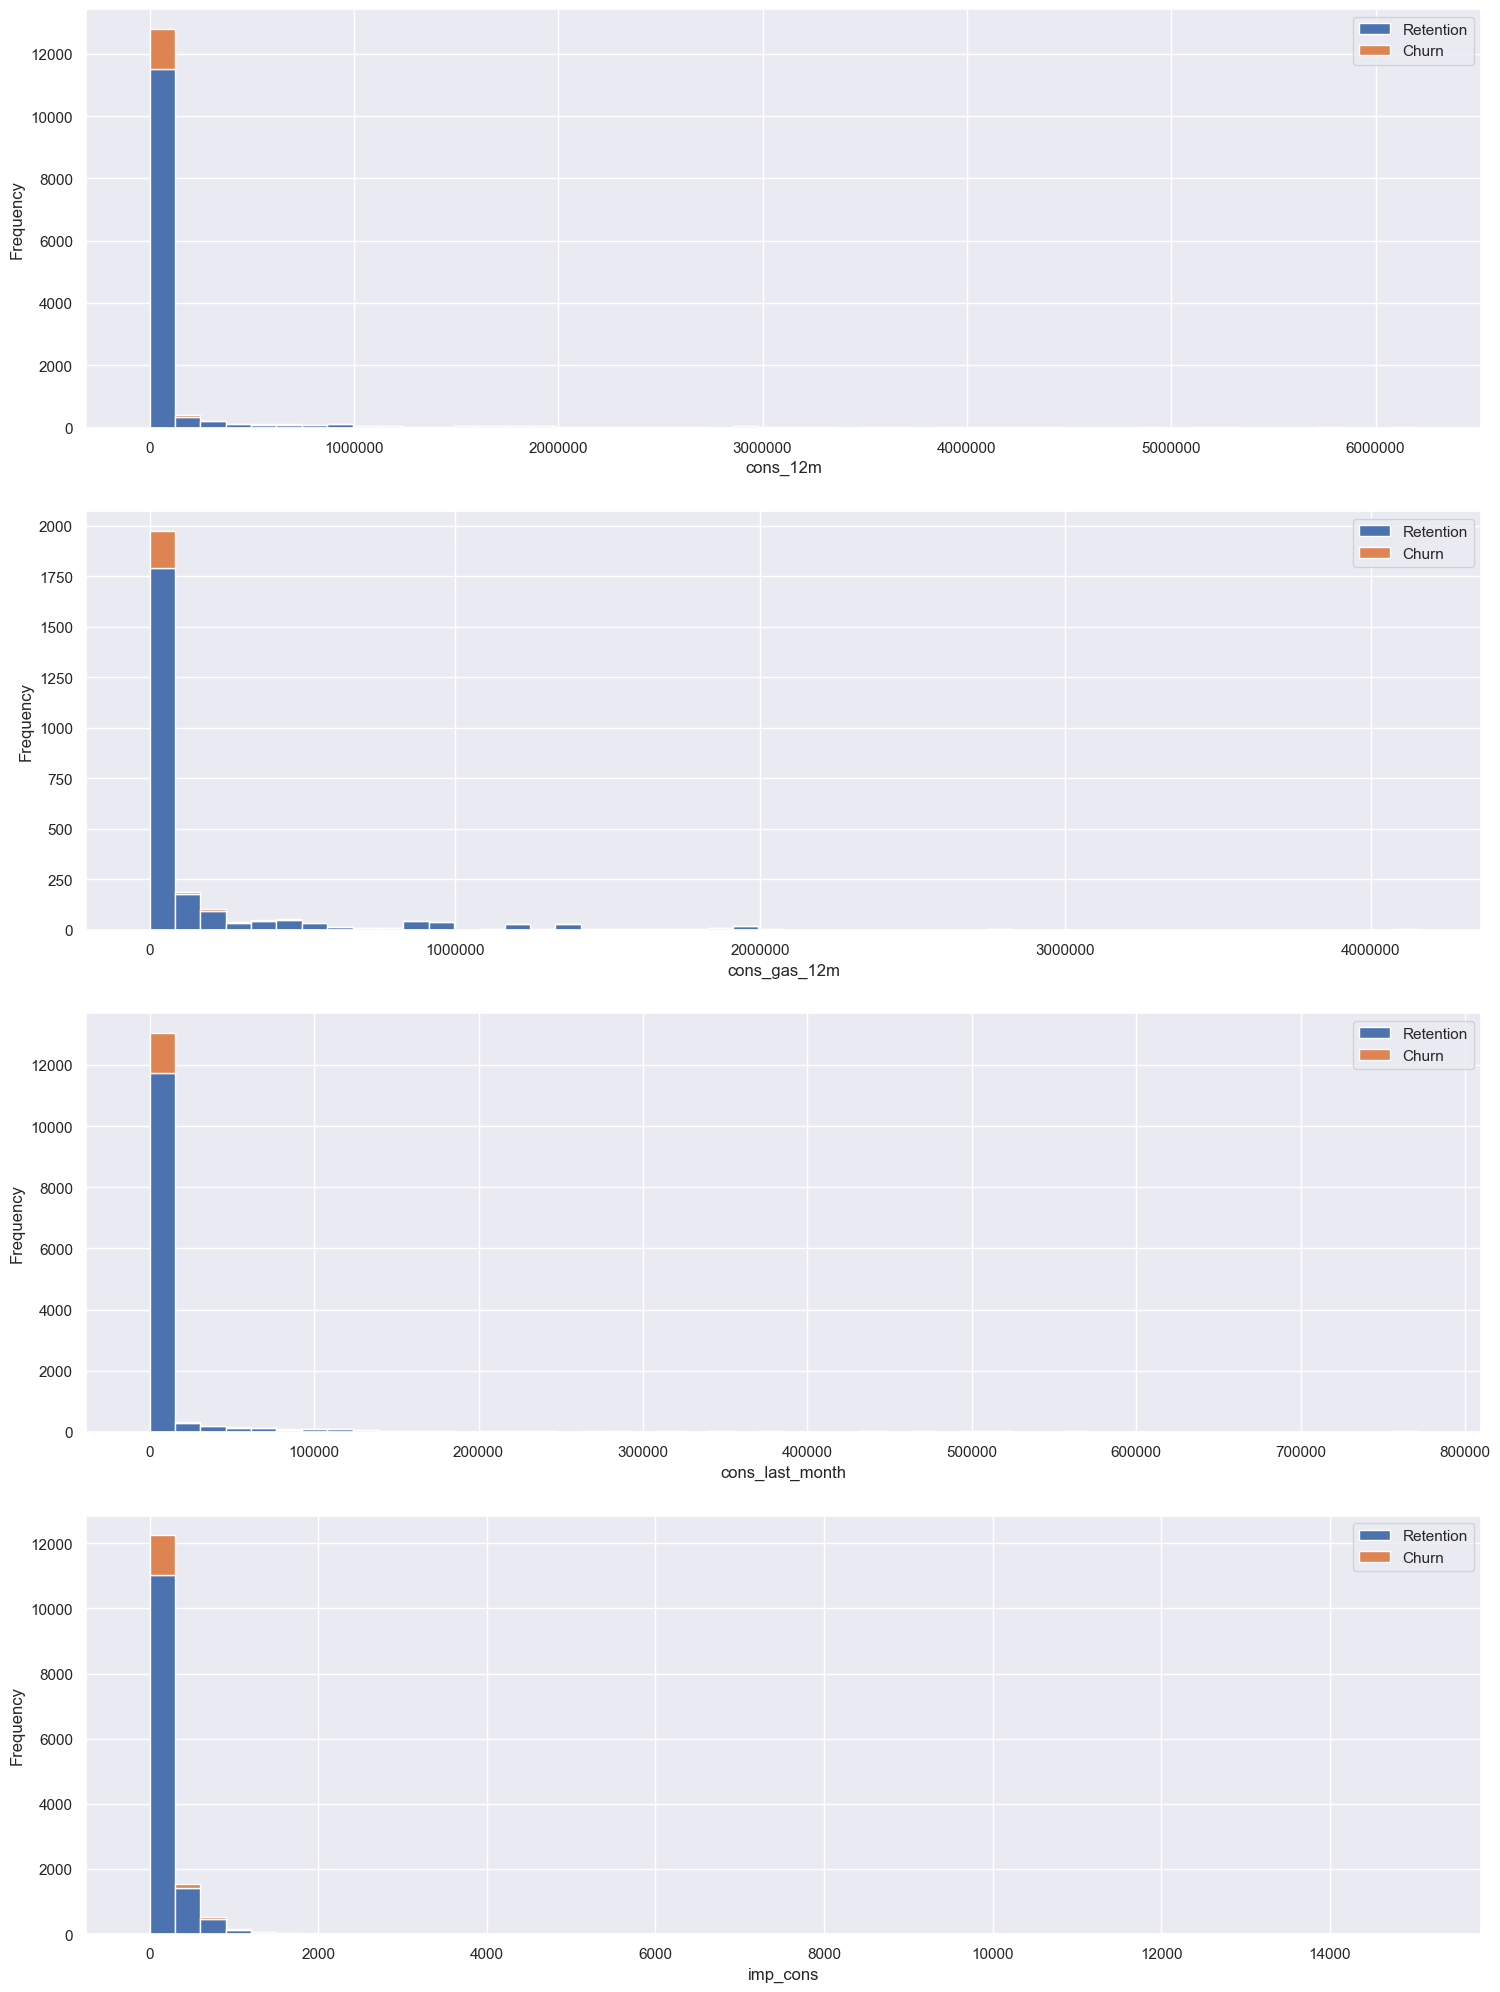

In [17]:
fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

plot_distribution(consumption, 'cons_12m', axs[0])
plot_distribution(consumption[consumption['has_gas'] == 't'], 'cons_gas_12m', axs[1])
plot_distribution(consumption, 'cons_last_month', axs[2])
plot_distribution(consumption, 'imp_cons', axs[3])

Evidently, the consumption data exhibits a highly positive skewness, featuring a significantly elongated right-tail towards higher values in the distribution. The values at both extremes of the distribution are likely to be outliers. To visualize these outliers in more detail, we can use a standard plot. A boxplot, which presents the distribution based on a five-number summary (minimum, first quartile, median, third quartile, and maximum), can help reveal outliers and their corresponding values. Additionally, it provides insights into the symmetry, tightness of data grouping, and any skewness in the dataset.

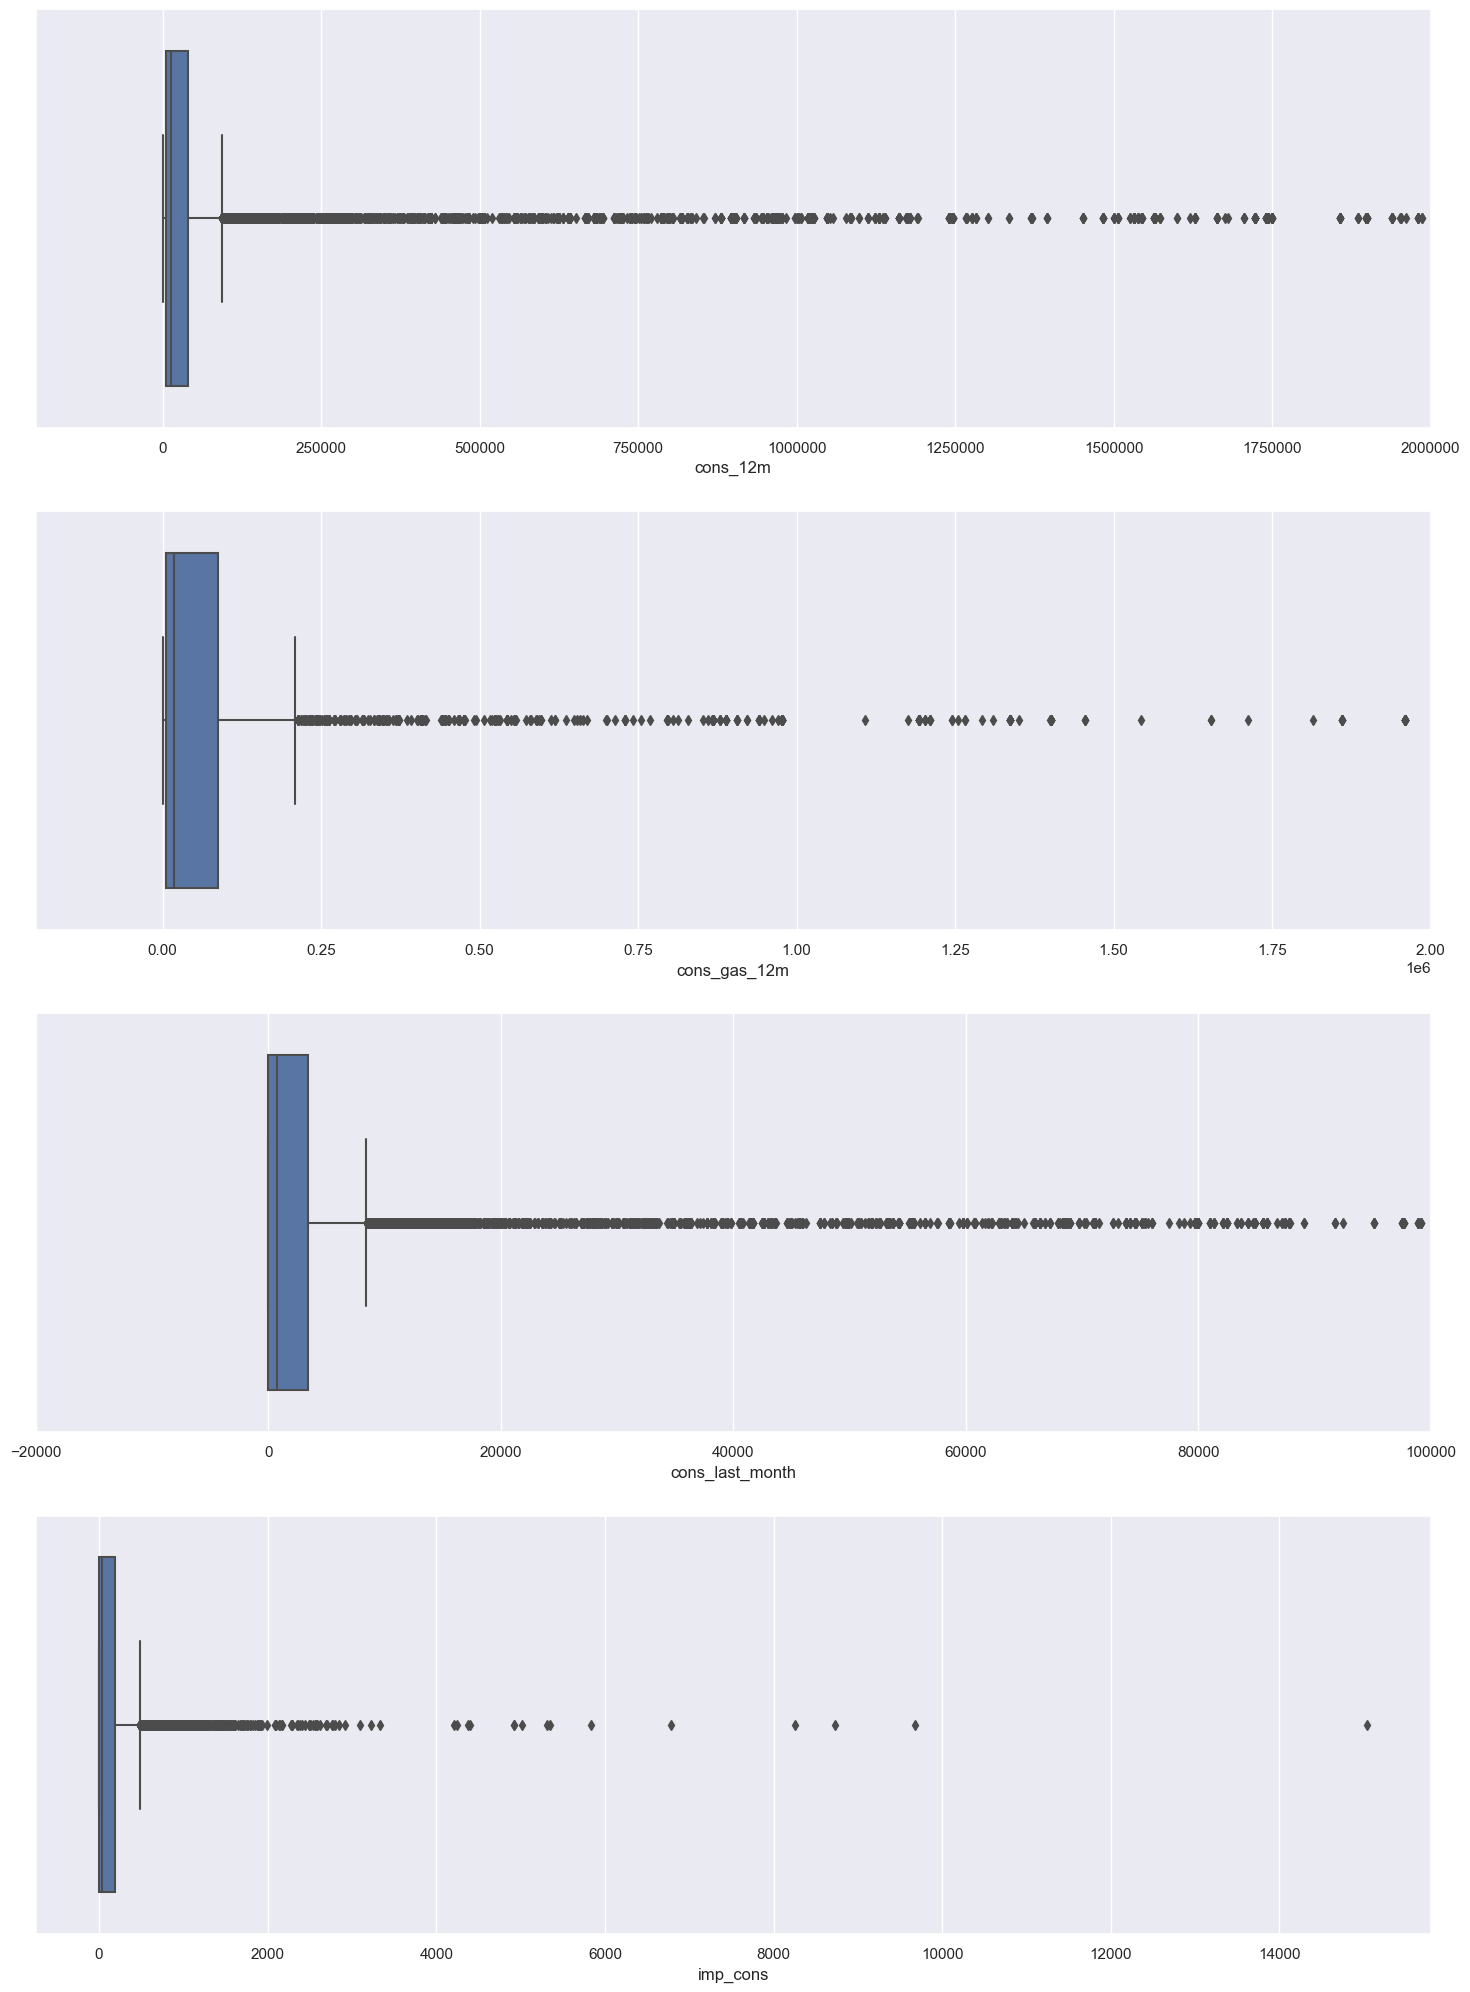

In [18]:
fig, axs = plt.subplots(nrows=4, figsize=(18,25))

# Plot histogram
sns.boxplot(x=consumption["cons_12m"], ax=axs[0])
sns.boxplot(x=consumption[consumption["has_gas"] == "t"]["cons_gas_12m"], ax=axs[1])
sns.boxplot(x=consumption["cons_last_month"], ax=axs[2])
sns.boxplot(x=consumption["imp_cons"], ax=axs[3])

# Remove scientific notation
for ax in axs:
    ax.ticklabel_format(style='plain', axis='x')
    # Set x-axis limit
    axs[0].set_xlim(-200000, 2000000)
    axs[1].set_xlim(-200000, 2000000)
    axs[2].set_xlim(-20000, 100000)
    plt.show()

Skewness and outliers will be addressed in the upcoming feature engineering phase in the next exercise.

### Forecast

In [19]:
forecast = client_df[
    ["id", "forecast_cons_12m", "forecast_cons_year", "forecast_discount_energy", 
    "forecast_meter_rent_12m", "forecast_price_energy_off_peak", "forecast_price_energy_peak", 
    "forecast_price_pow_off_peak", "churn"]
]


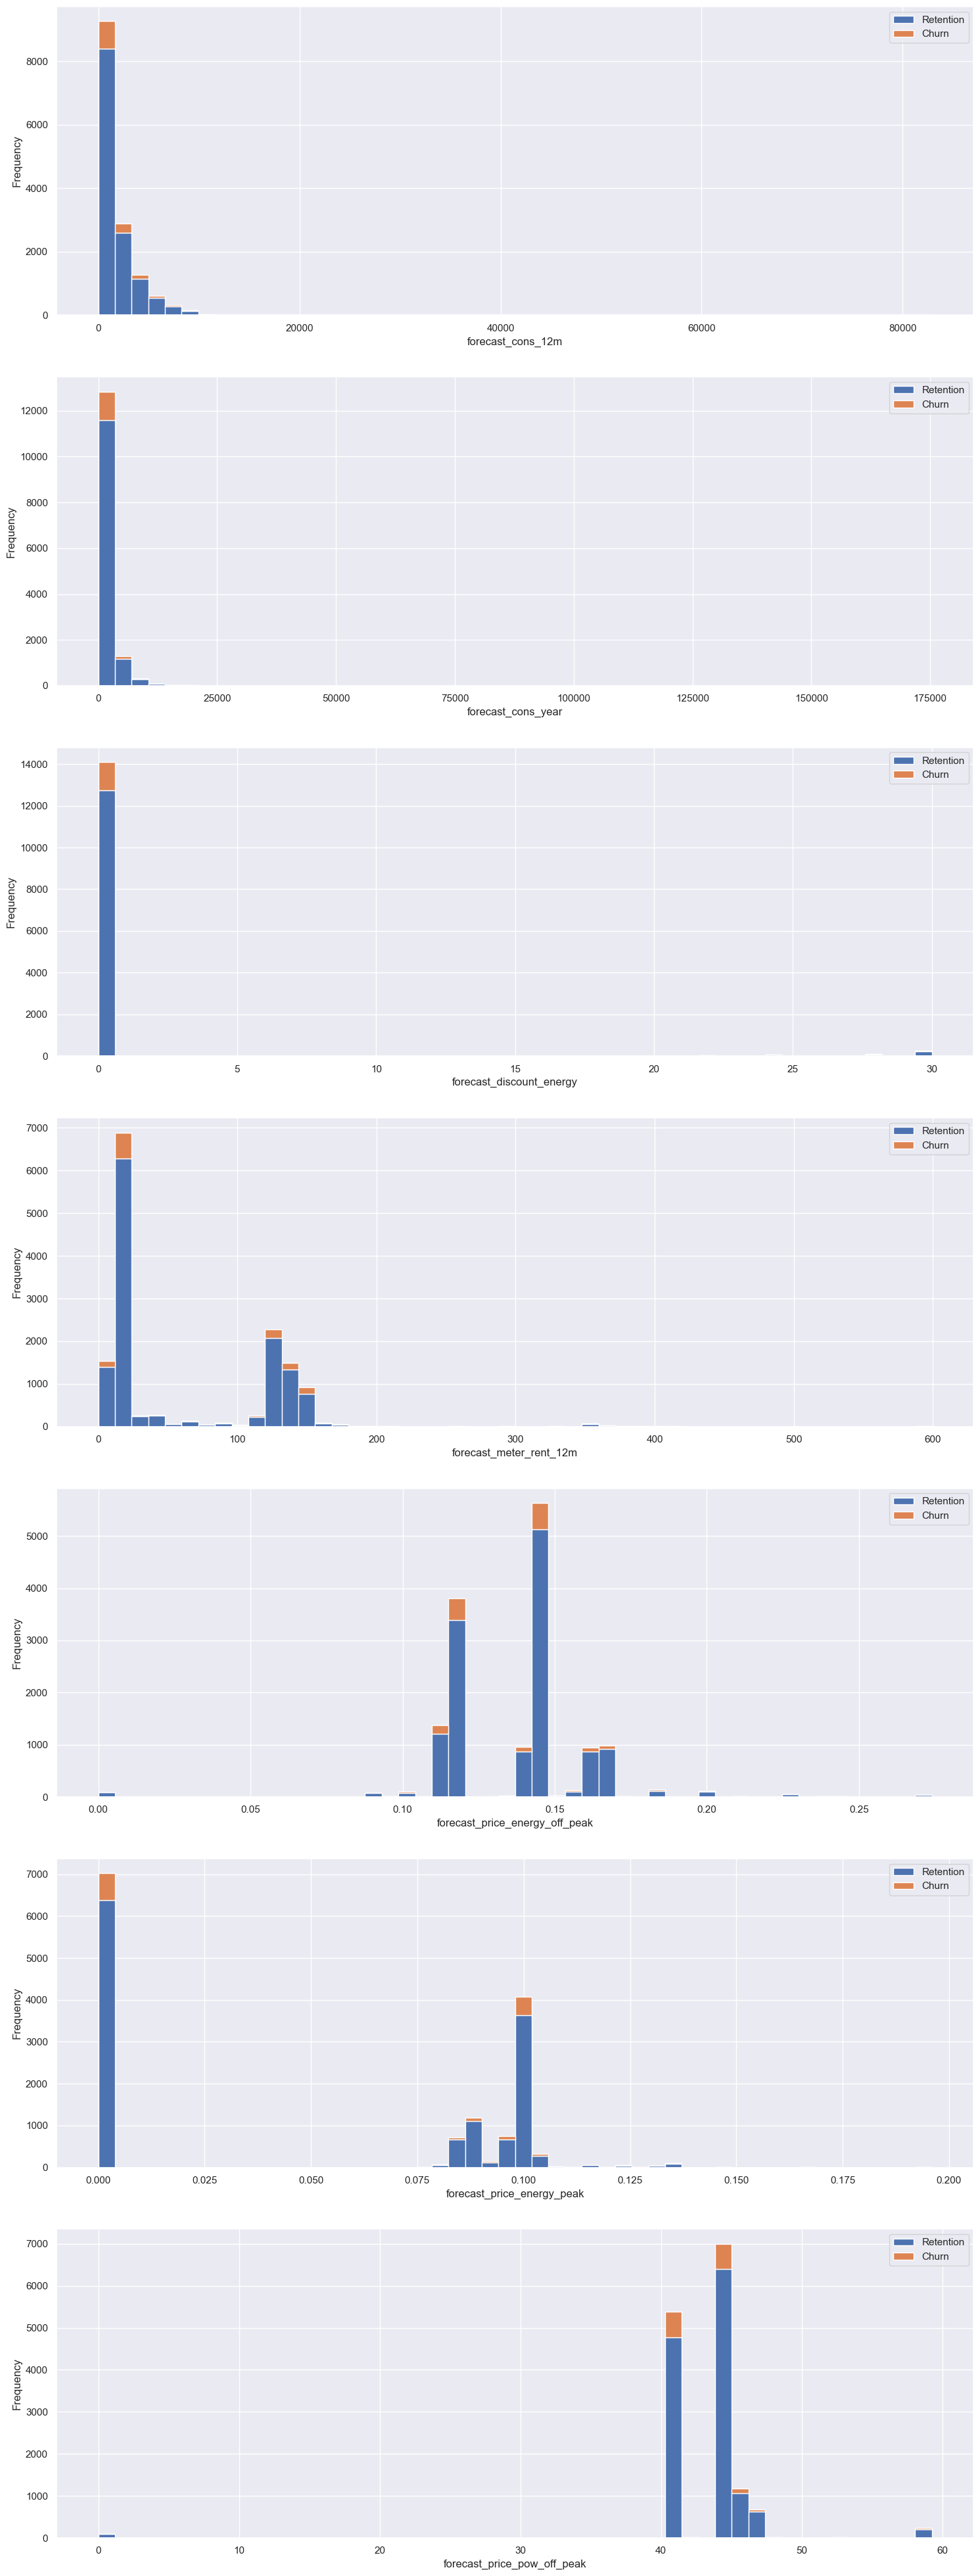

In [20]:
fig, axs = plt.subplots(nrows=7, figsize=(18, 50))

# Plot histogram
plot_distribution(client_df, "forecast_cons_12m", axs[0])
plot_distribution(client_df, "forecast_cons_year", axs[1])
plot_distribution(client_df, "forecast_discount_energy", axs[2])
plot_distribution(client_df, "forecast_meter_rent_12m", axs[3])
plot_distribution(client_df, "forecast_price_energy_off_peak", axs[4])
plot_distribution(client_df, "forecast_price_energy_peak", axs[5])
plot_distribution(client_df, "forecast_price_pow_off_peak", axs[6])


Similar to the consumption plots, many variables display a high positive skewness, resulting in an elongated tail towards higher values. In the next exercise, we will implement some transformations to address and correct this skewness.

### Contract type

In [21]:
contract_type = client_df[['id', 'has_gas', 'churn']]
contract = contract_type.groupby([contract_type['churn'], contract_type['has_gas']])['id'].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

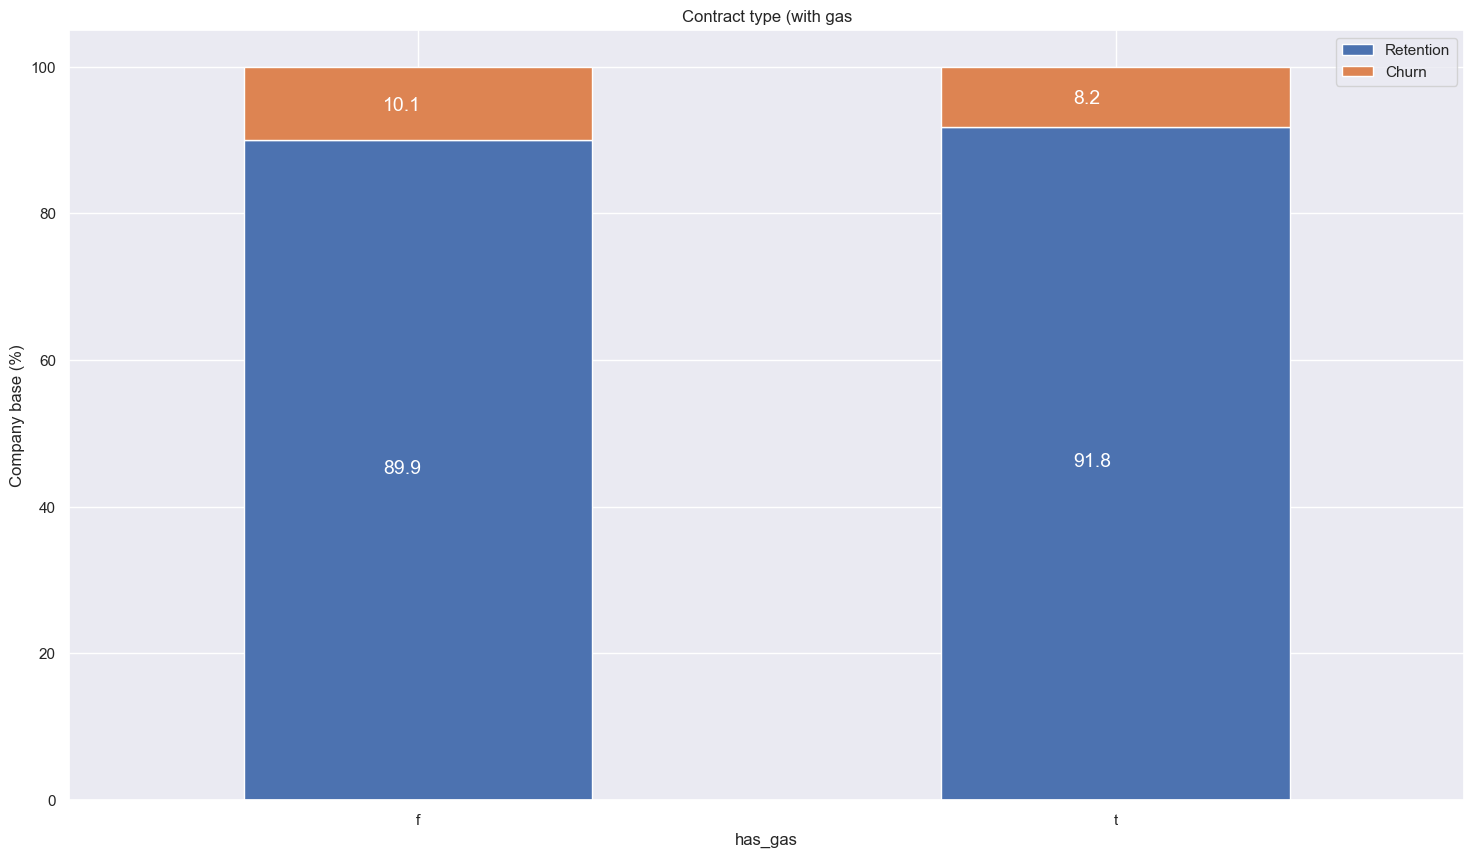

In [22]:
plot_stacked_bars(contract_percentage, 'Contract type (with gas')

### Margins

In [23]:
margin = client_df[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']]

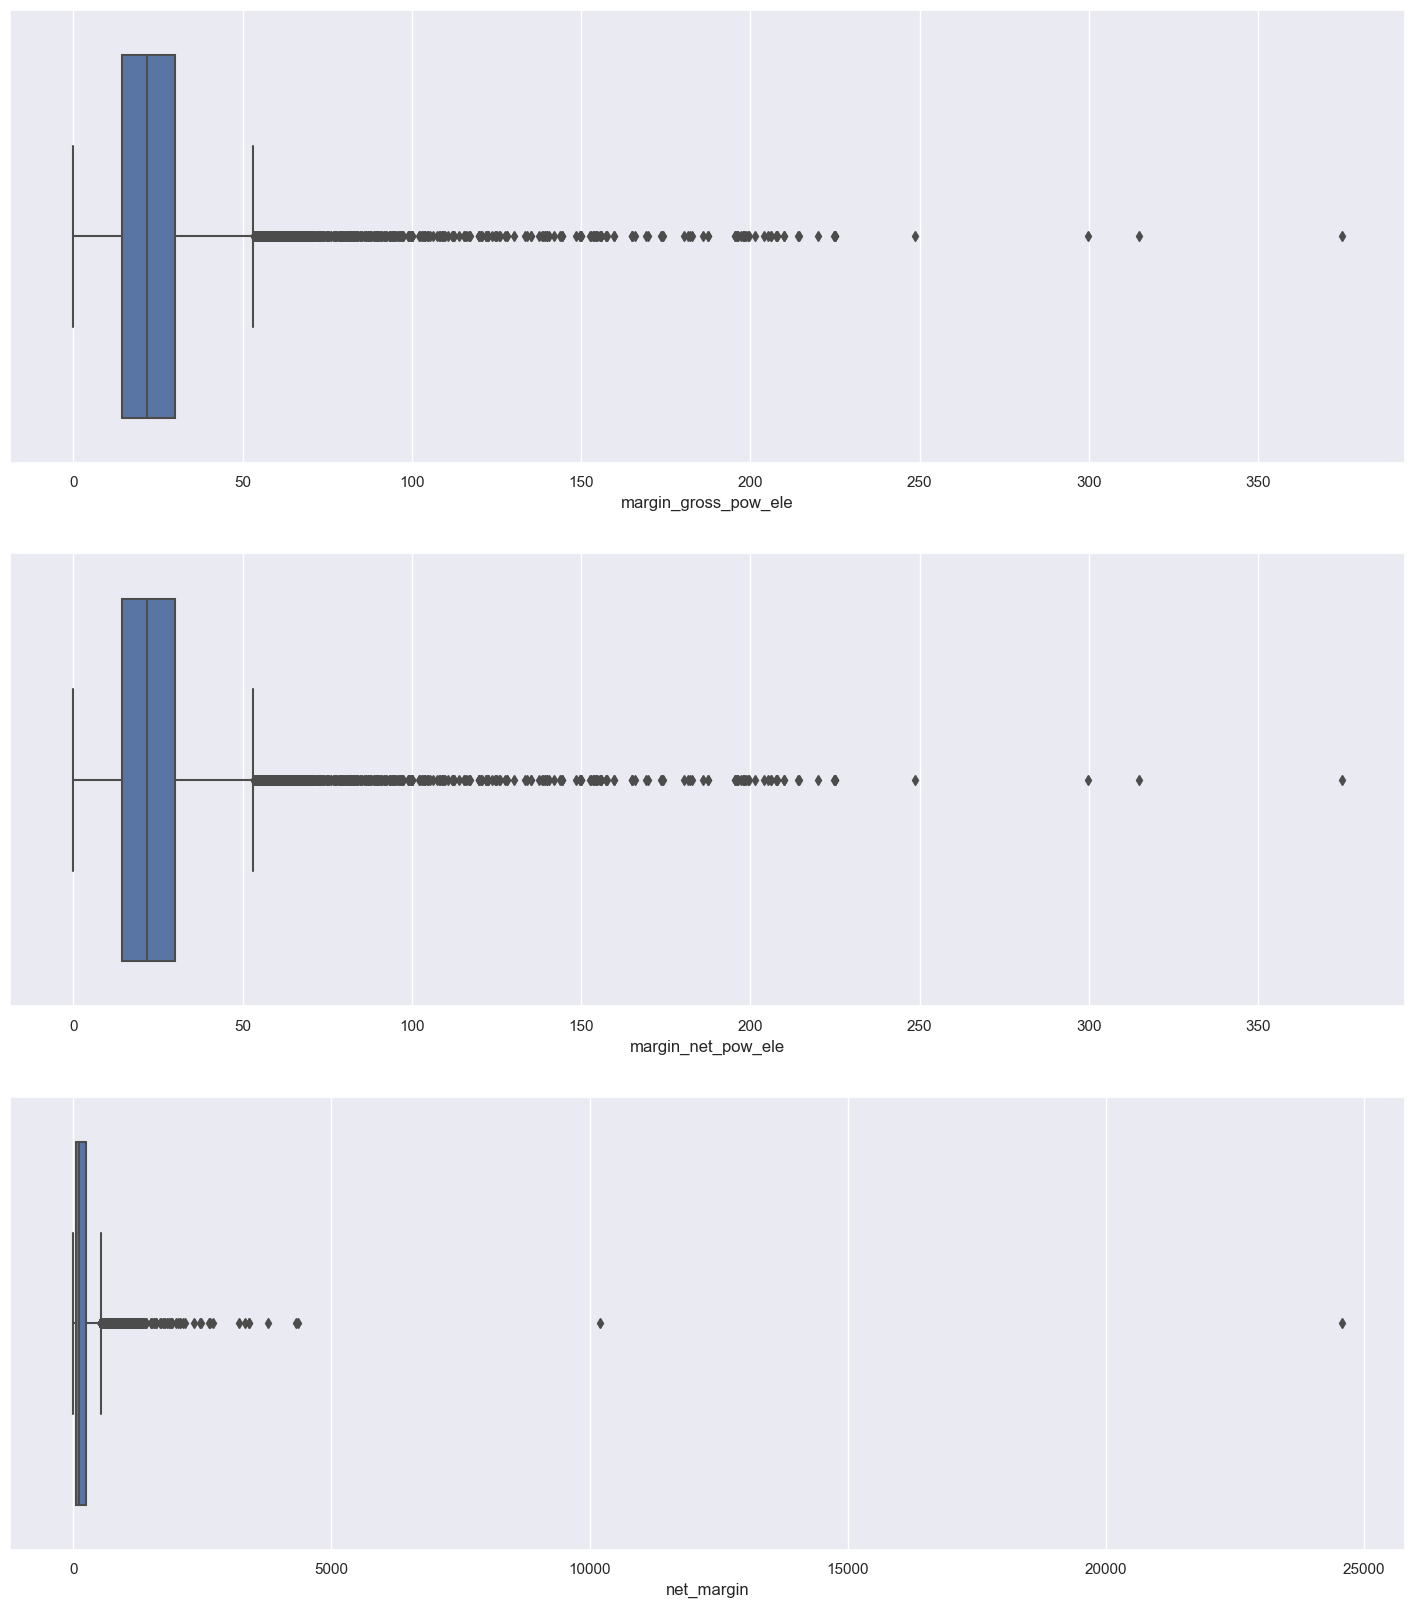

In [24]:
fig, axs = plt.subplots(nrows=3, figsize=(18,20))
# Plot histogram
sns.boxplot(x=margin["margin_gross_pow_ele"], ax=axs[0])
sns.boxplot(x=margin["margin_net_pow_ele"],ax=axs[1])
sns.boxplot(x=margin["net_margin"], ax=axs[2])
# Remove scientific notation
axs[0].ticklabel_format(style='plain', axis='x')
axs[1].ticklabel_format(style='plain', axis='x')
axs[2].ticklabel_format(style='plain', axis='x')
plt.show()

Outliers are noticeable in this set of data as well, and strategies for addressing them will be implemented in the next exercise.

### Subscribed power

In [25]:
power = client_df[['id', 'pow_max', 'churn']]

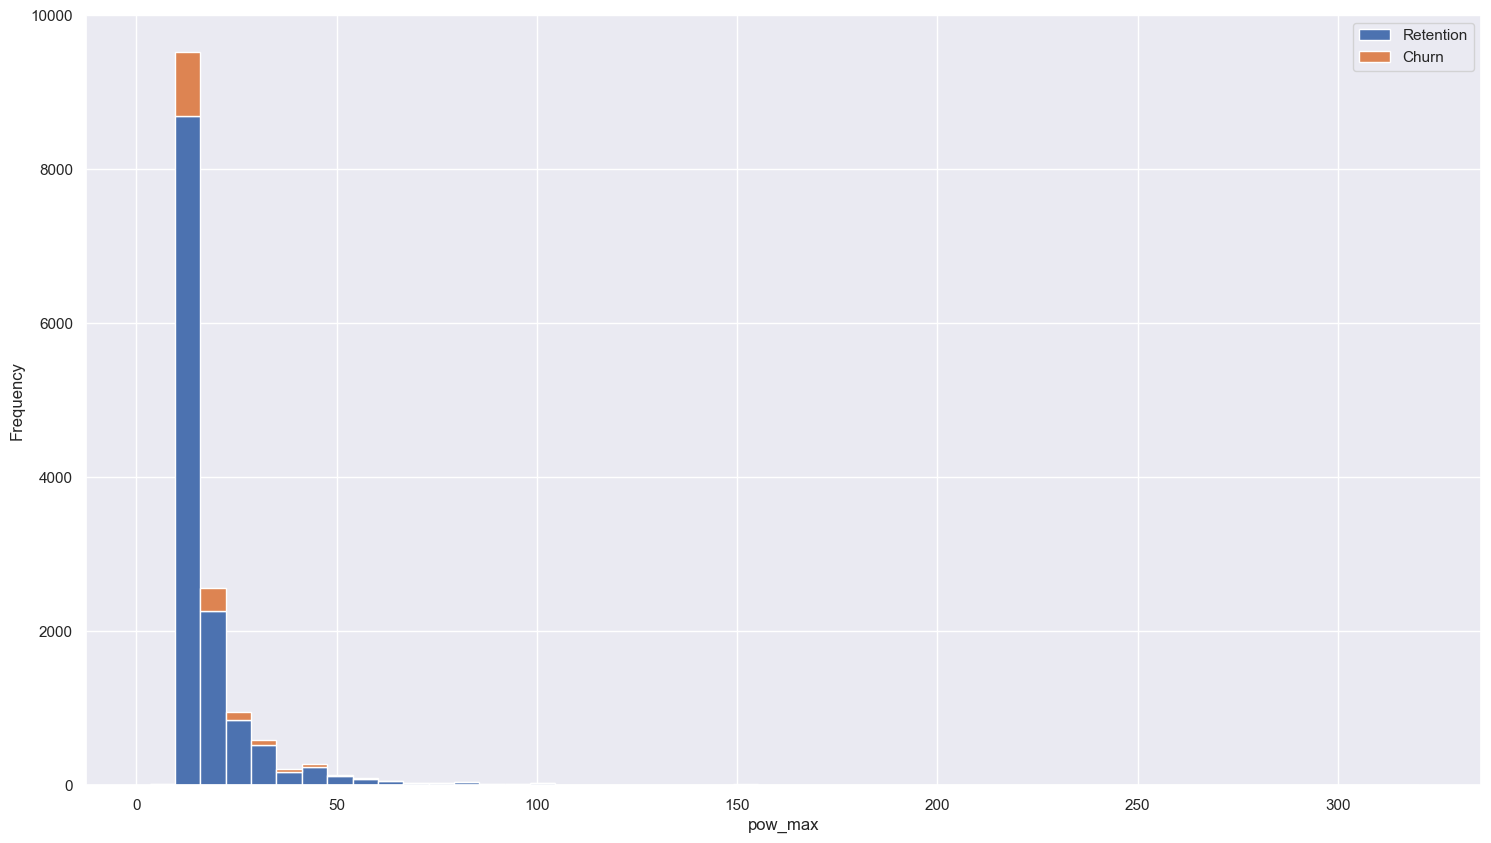

In [26]:
fig, axs = plt.subplots(nrows=1, figsize=(18, 10))
plot_distribution(power, 'pow_max', axs)

### Other columns

In [27]:
others = client_df[['id', 'nb_prod_act', 'num_years_antig', 'origin_up', 'churn']]
products = others.groupby([others["nb_prod_act"],others["churn"]])["id"].count().unstack(level=1)
products_percentage = (products.div(products.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

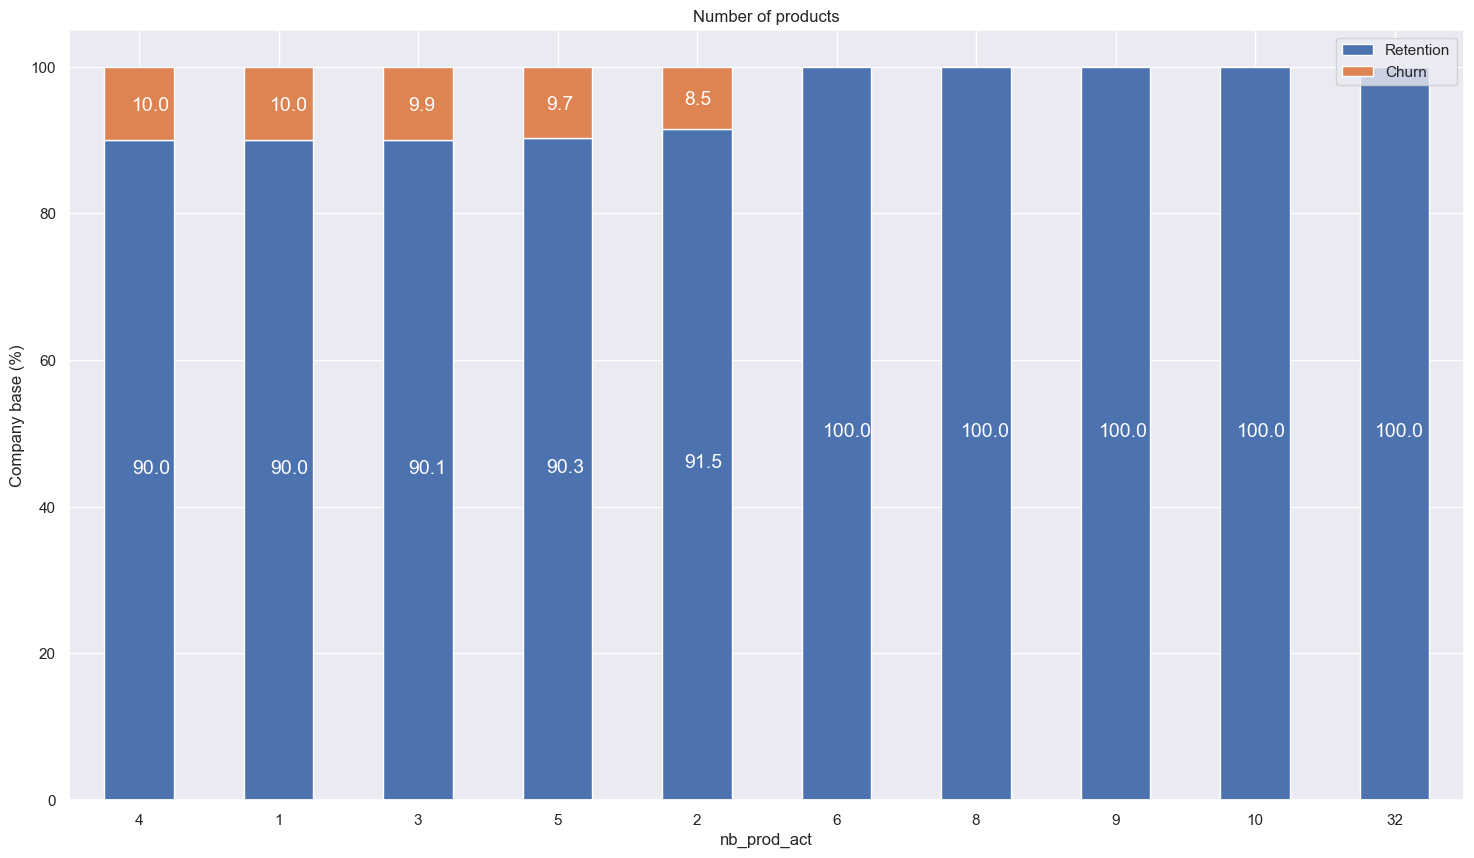

In [28]:
plot_stacked_bars(products_percentage, "Number of products")

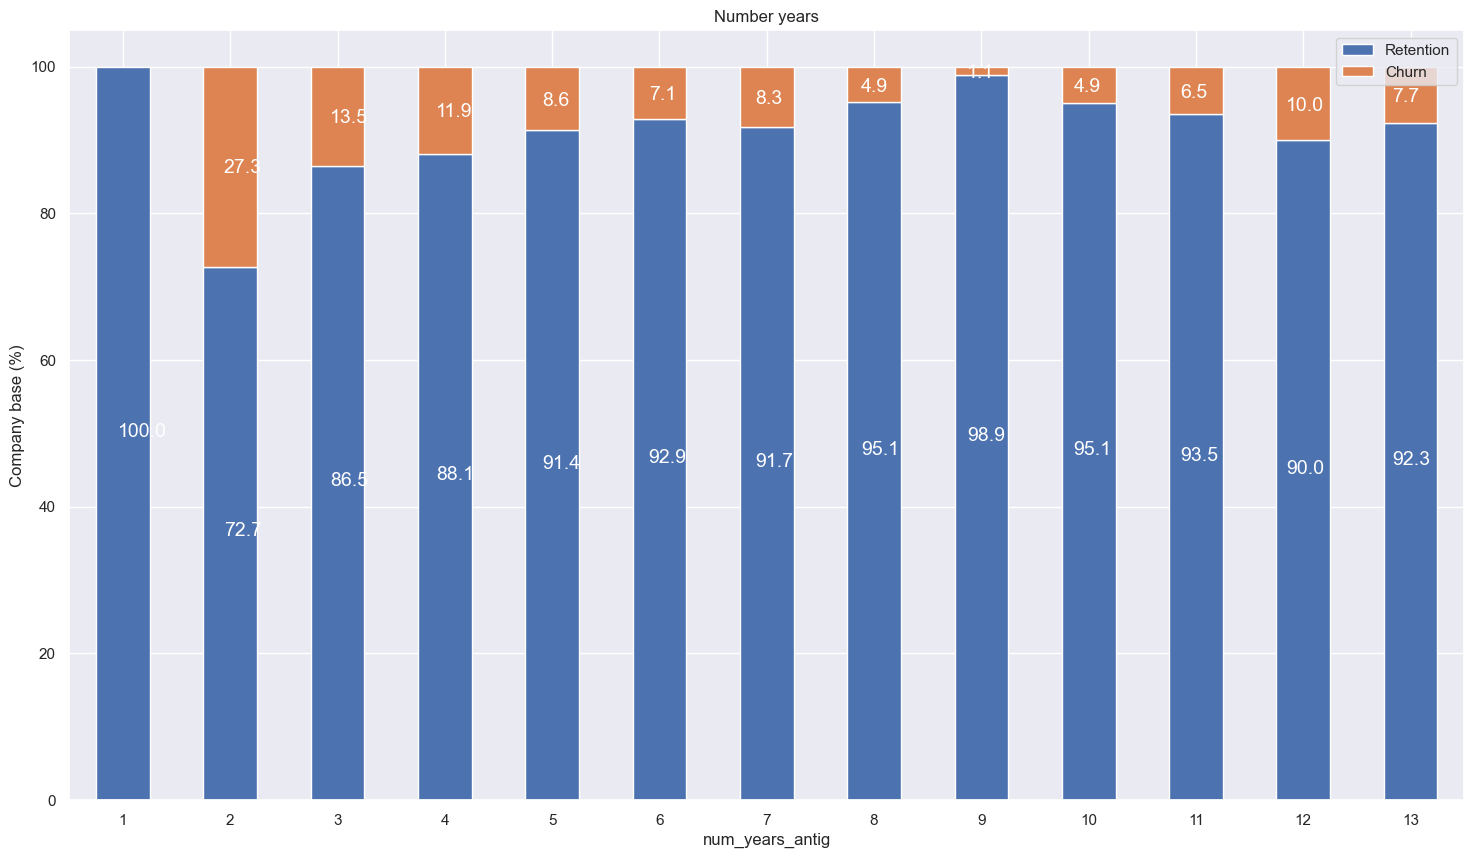

In [29]:
years_antig = others.groupby([others["num_years_antig"],others["churn"]])["id"].count().unstack(level=1)
years_antig_percentage = (years_antig.div(years_antig.sum(axis=1), axis=0)*100)
plot_stacked_bars(years_antig_percentage, "Number years")

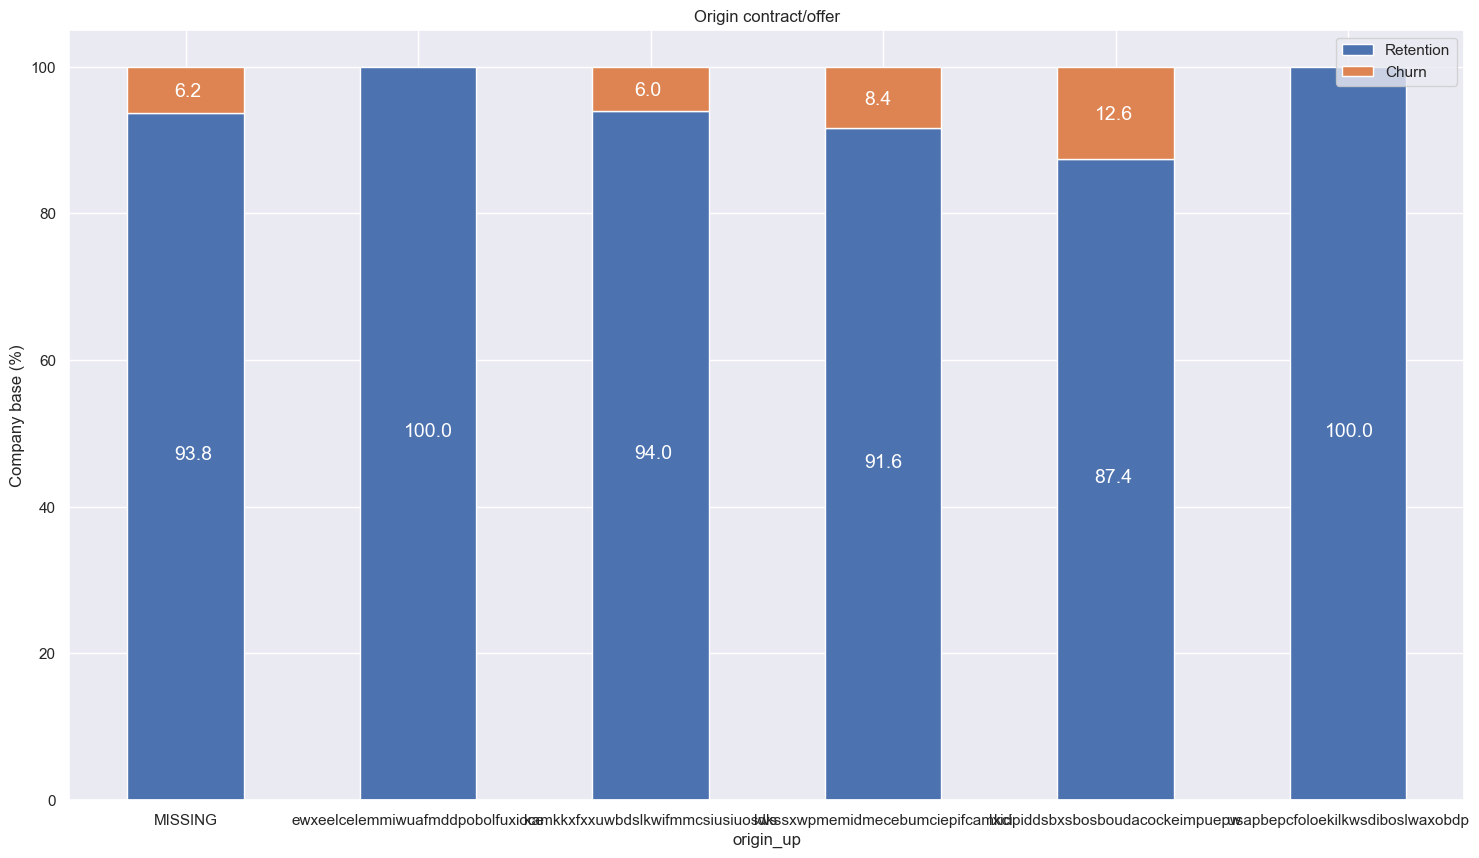

In [30]:
origin = others.groupby([others["origin_up"],others["churn"]])["id"].count().unstack(level=1)
origin_percentage = (origin.div(origin.sum(axis=1), axis=0)*100)
plot_stacked_bars(origin_percentage, "Origin contract/offer")

## 5. Hypothesis investigation

Having thoroughly explored the data, the next step is to examine whether price sensitivity plays a role in churn. First, let's precisely define what is meant by price sensitivity.

    > Given that we possess consumption data for each company for the year 2015, we will generate new features to gauge "price sensitivity." This will involve calculating averages for the entire year, the last 6 months, and the last 3 months.


In [53]:
# Print the columns of mean_year DataFrame
print(mean_year.columns)

Index(['id', 'mean_year_price_p1_var', 'mean_year_price_p2_var',
       'mean_year_price_p3_var', 'mean_year_price_p1_fix',
       'mean_year_price_p2_fix', 'mean_year_price_p3_fix',
       'mean_year_price_p1', 'mean_year_price_p2', 'mean_year_price_p3'],
      dtype='object')


In [57]:
print(mean_year.head())


                                 id  price_off_peak_var  price_peak_var  \
0  0002203ffbb812588b632b9e628cc38d            0.124338        0.103794   
1  0004351ebdd665e6ee664792efc4fd13            0.146426        0.000000   
2  0010bcc39e42b3c2131ed2ce55246e3c            0.181558        0.000000   
3  0010ee3855fdea87602a5b7aba8e42de            0.118757        0.098292   
4  00114d74e963e47177db89bc70108537            0.147926        0.000000   

   price_mid_peak_var  price_off_peak_fix  price_peak_fix  price_mid_peak_fix  
0            0.073160           40.701732       24.421038           16.280694  
1            0.000000           44.385450        0.000000            0.000000  
2            0.000000           45.319710        0.000000            0.000000  
3            0.069032           40.647427       24.388455           16.258971  
4            0.000000           44.266930        0.000000            0.000000  


In [34]:
print(mean_df.columns)

Index(['id', 'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
       'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix'],
      dtype='object')


In [35]:
# Transform date columns to datetime type
def transform_date_columns(df, date_columns):
    for col in date_columns:
        df[col] = pd.to_datetime(df[col], format='%Y-%m-%d')

date_columns = ["date_activ", "date_end", "date_modif_prod", "date_renewal"]
transform_date_columns(client_df, date_columns)
price_df['price_date'] = pd.to_datetime(price_df['price_date'], format='%Y-%m-%d')

# Create mean average data
def calculate_mean_prices(df, start_date):
    filtered_df = df[df['price_date'] > start_date]
    mean_df = filtered_df.groupby(['id']).mean(numeric_only=True).reset_index()
    return mean_df

# Calculate mean prices for different intervals
intervals = [('mean_year_', '2015-01-01'), ('mean_6m_', '2015-06-01'), ('mean_3m_', '2015-10-01')]

mean_dfs = []
for prefix, start_date in intervals:
    mean_df = calculate_mean_prices(price_df, start_date)
    mean_df = mean_df.rename(index=str, columns={
        "price_off_peak_var": f"{prefix}price_p1_var",
        "price_peak_var": f"{prefix}price_p2_var",
        "price_mid_peak_var": f"{prefix}price_p3_var",
        "price_off_peak_fix": f"{prefix}price_p1_fix",
        "price_peak_fix": f"{prefix}price_p2_fix",
        "price_mid_peak_fix": f"{prefix}price_p3_fix"
    })
    mean_df[f"{prefix}price_p1"] = mean_df[f"{prefix}price_p1_var"] + mean_df[f"{prefix}price_p1_fix"]
    mean_df[f"{prefix}price_p2"] = mean_df[f"{prefix}price_p2_var"] + mean_df[f"{prefix}price_p2_fix"]
    mean_df[f"{prefix}price_p3"] = mean_df[f"{prefix}price_p3_var"] + mean_df[f"{prefix}price_p3_fix"]
    mean_dfs.append(mean_df)

# Merge into 1 dataframe
price_features = pd.merge(mean_dfs[0], mean_dfs[1], on='id')
price_features = pd.merge(price_features, mean_dfs[2], on='id')

In [36]:
price_features.head()

,id,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3,...,mean_6m_price_p3,mean_3m_price_p1_var,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3
0,0002203ffbb812588b632b9e628cc38d,0.124178,0.103777,0.073427,40.714074,24.428444,16.285631,40.838253,24.532221,16.359057,...,16.365283,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274
1,0004351ebdd665e6ee664792efc4fd13,0.146279,0.000000,0.000000,44.396225,0.000000,0.000000,44.542504,0.000000,0.000000,...,0.000000,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.184351,0.000000,0.000000,45.399255,0.000000,0.000000,45.583607,0.000000,0.000000,...,0.000000,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118364,0.098091,0.069067,40.654833,24.392898,16.261933,40.773196,24.490990,16.331001,...,16.360973,0.113068,0.095385,0.069409,40.728885,24.43733,16.291555,40.841953,24.532715,16.360964
4,00114d74e963e47177db89bc70108537,0.147789,0.000000,0.000000,44.266930,0.000000,0.000000,44.414719,0.000000,0.000000,...,0.000000,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000


Let's proceed by merging the churn data and examining whether there is any correlation between price sensitivity and churn.

In [37]:
price_analysis = pd.merge(price_features, client_df[['id', 'churn']], on='id')
price_analysis.head()

,id,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3,...,mean_3m_price_p1_var,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn
0,0002203ffbb812588b632b9e628cc38d,0.124178,0.103777,0.073427,40.714074,24.428444,16.285631,40.838253,24.532221,16.359057,...,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274,0
1,0004351ebdd665e6ee664792efc4fd13,0.146279,0.000000,0.000000,44.396225,0.000000,0.000000,44.542504,0.000000,0.000000,...,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.184351,0.000000,0.000000,45.399255,0.000000,0.000000,45.583607,0.000000,0.000000,...,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000,0
3,00114d74e963e47177db89bc70108537,0.147789,0.000000,0.000000,44.266930,0.000000,0.000000,44.414719,0.000000,0.000000,...,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000,0
4,0013f326a839a2f6ad87a1859952d227,0.125918,0.105522,0.075178,40.728885,24.437330,16.291555,40.854803,24.542852,16.366733,...,0.121647,0.103413,0.075460,40.728885,24.43733,16.291555,40.850532,24.540743,16.367015,0


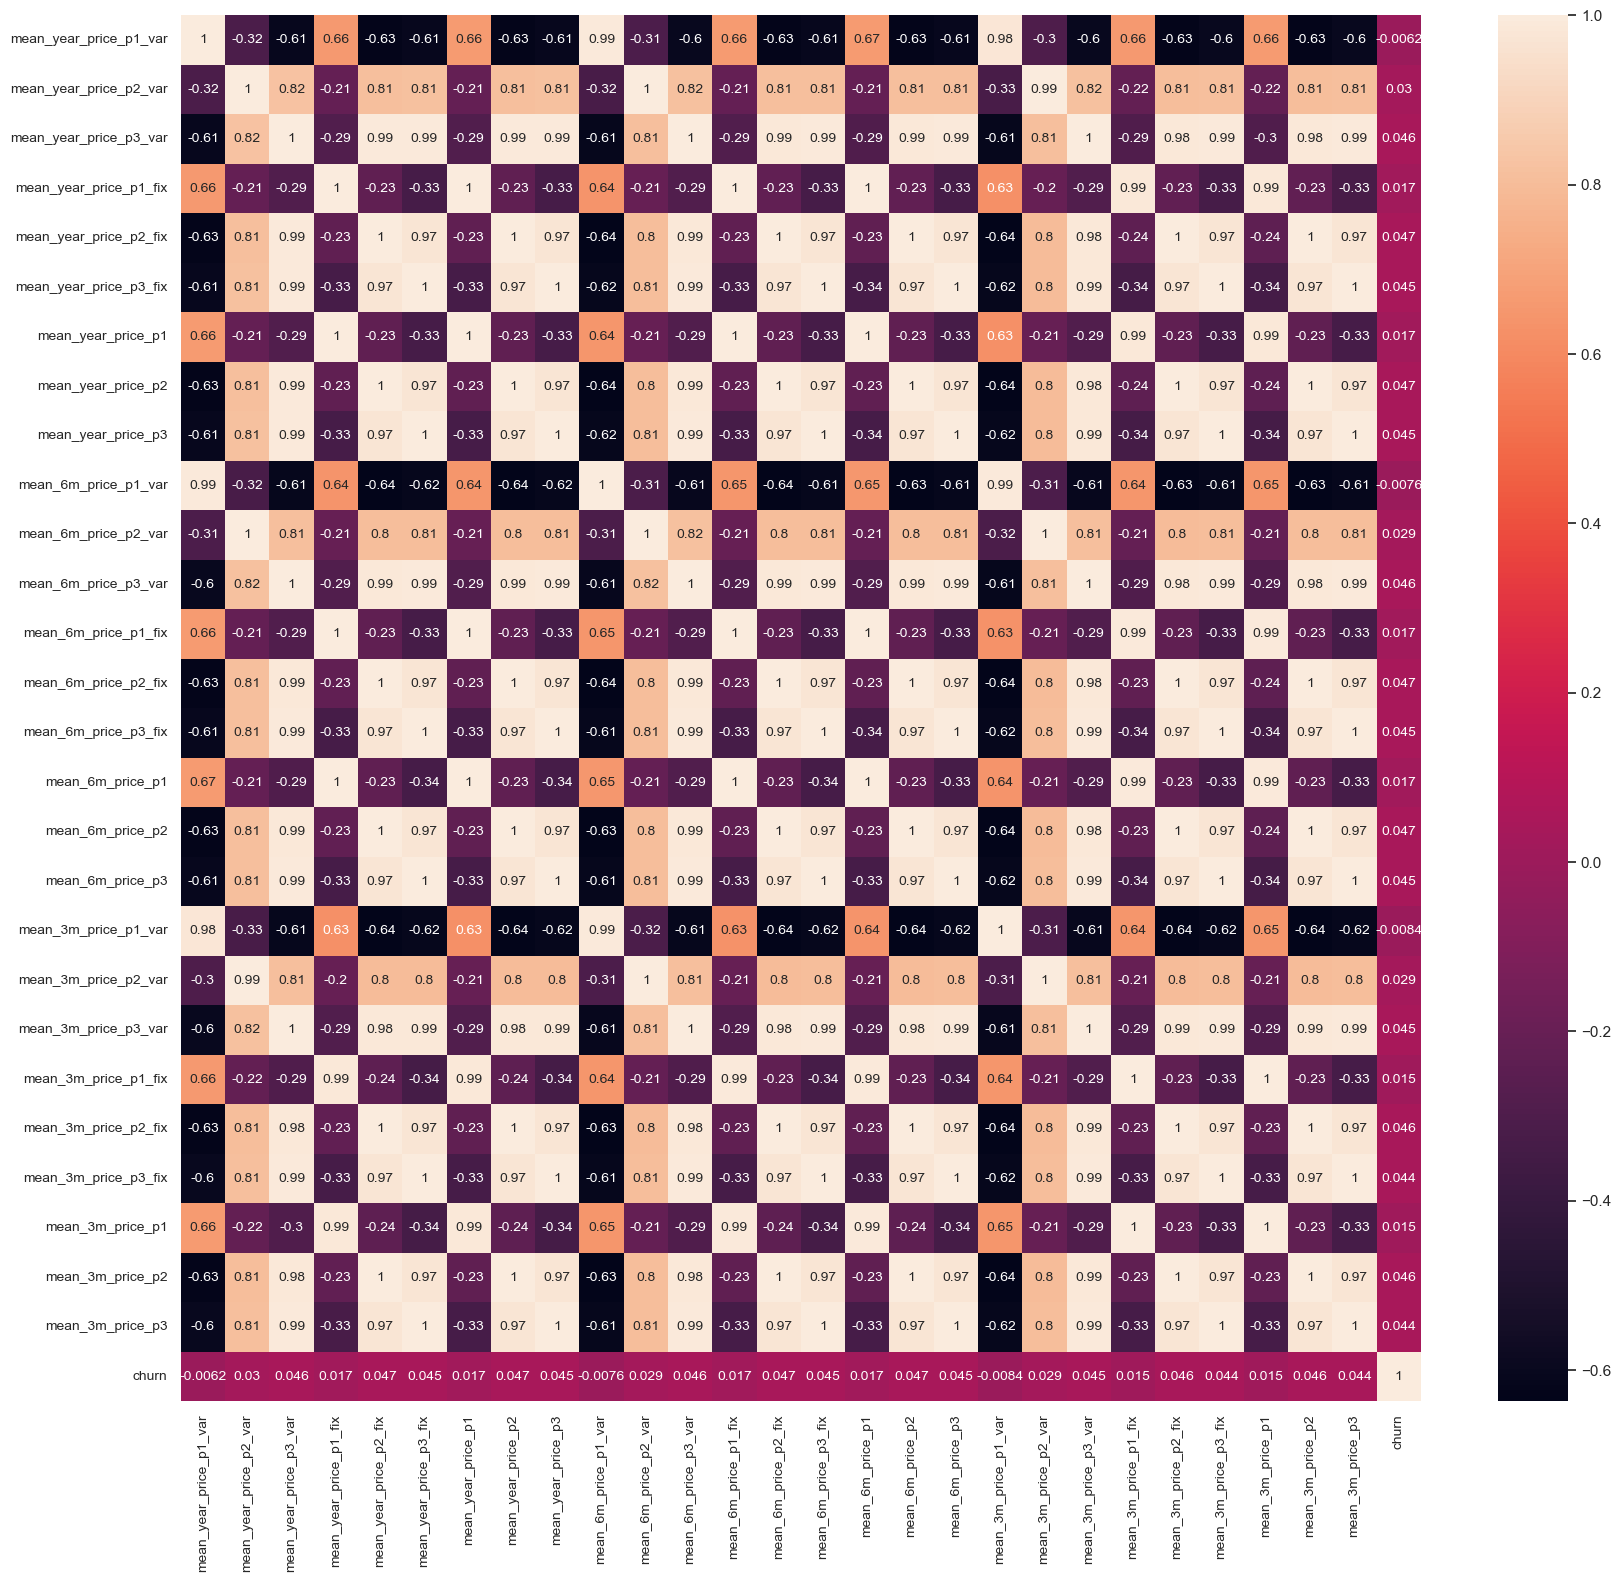

In [39]:
corr = price_analysis.corr(numeric_only=True)

# Plot correlation
plt.figure(figsize=(20, 18))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, annot_kws={'size': 10})

# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

The correlation plot reveals a higher magnitude of correlation among other price sensitivity variables; however, the overall correlation with churn is very low. This suggests a weak linear relationship between price sensitivity and churn. To consider price sensitivity as a significant driver for predicting churn, it may be necessary to engineer the feature differently.

In [40]:
merged_data = pd.merge(client_df.drop(columns=['churn']), price_analysis, on='id')

In [41]:
merged_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_3m_price_p1_var,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0


In [42]:
merged_data.to_csv('clean_data_after_eda.csv')